<a href="https://colab.research.google.com/github/Suharsh007/us_house_price_prediction/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task is to build a data science model for US House Prices.
On researching I got to know that 2 things affects prices.
Supply and Demand.
In supply Building Permits, Construction Spending, Housing Starts and Homes Sold effect HPI(Housing Price Index)
In demand Mortage Rates, GDP, Unemployement and Delinquency Rate on Mortgages affects HPI.
Using these all the bases the data is anaysed and predicted.

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
demand = pd.read_csv('/content/demand.csv')
demand.head()

,DATE,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI
0,2000-01-01,4.03,8.26,12935.252,1.95,101.34
1,2000-04-01,3.93,8.32,13170.749,1.97,103.67
2,2000-07-01,4.00,8.02,13183.890,2.09,105.79
3,2000-10-01,3.90,7.62,13262.250,2.23,108.27
4,2001-01-01,4.23,7.01,13219.251,2.34,110.48


Converting all the DATE to DATE_TIME format

In [29]:
demand['DATE']= pd.to_datetime(demand['DATE'])
demand.head()

,DATE,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI
0,2000-01-01,4.03,8.26,12935.252,1.95,101.34
1,2000-04-01,3.93,8.32,13170.749,1.97,103.67
2,2000-07-01,4.00,8.02,13183.890,2.09,105.79
3,2000-10-01,3.90,7.62,13262.250,2.23,108.27
4,2001-01-01,4.23,7.01,13219.251,2.34,110.48


In [30]:
supply= pd.read_csv('/content/supply.csv')
supply.head()

,Unnamed: 0,Period,Permit_Number,construction,Homes_Sold,Housing_Starts
0,1,01-01-2000,1727,353065,873,1636
1,2,01-02-2000,1692,351933,856,1737
2,3,01-03-2000,1651,353452,900,1604
3,4,01-04-2000,1597,356188,841,1626
4,5,01-05-2000,1543,349907,857,1575


Here converting Period column to DATE_TIME format and then changing the column name to DATE

In [31]:
supply['Period'] = pd.to_datetime(supply['Period'], format='%d-%m-%Y').dt.strftime('%Y-%m-%d')
supply.rename(columns={'Period': 'DATE'}, inplace=True)
supply['DATE'] = pd.to_datetime(supply['DATE'])
supply.head()

,Unnamed: 0,DATE,Permit_Number,construction,Homes_Sold,Housing_Starts
0,1,2000-01-01,1727,353065,873,1636
1,2,2000-02-01,1692,351933,856,1737
2,3,2000-03-01,1651,353452,900,1604
3,4,2000-04-01,1597,356188,841,1626
4,5,2000-05-01,1543,349907,857,1575


Now merging both Demand and Supply tables.

In [32]:
df = pd.merge(demand,supply)
df.head()

,DATE,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI,Unnamed: 0,Permit_Number,construction,Homes_Sold,Housing_Starts
0,2000-01-01,4.03,8.26,12935.252,1.95,101.34,1,1727,353065,873,1636
1,2000-04-01,3.93,8.32,13170.749,1.97,103.67,4,1597,356188,841,1626
2,2000-07-01,4.00,8.02,13183.890,2.09,105.79,7,1542,337374,887,1463
3,2000-10-01,3.90,7.62,13262.250,2.23,108.27,10,1577,344095,933,1549
4,2001-01-01,4.23,7.01,13219.251,2.34,110.48,13,1699,348279,936,1600


In [33]:
df['year'] = df['DATE'].dt.year
df['month'] = df['DATE'].dt.month
df['day'] = df['DATE'].dt.day

In [34]:
df.drop('DATE',axis=1,inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 83
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UNEM_RATE       84 non-null     float64
 1   MORTGAGE        84 non-null     float64
 2   GDPC1           84 non-null     float64
 3   FORECLOSURES    84 non-null     float64
 4   HPI             84 non-null     float64
 5   Unnamed: 0      84 non-null     int64  
 6   Permit_Number   84 non-null     int64  
 7   construction    84 non-null     int64  
 8   Homes_Sold      84 non-null     int64  
 9   Housing_Starts  84 non-null     int64  
 10  year            84 non-null     int64  
 11  month           84 non-null     int64  
 12  day             84 non-null     int64  
dtypes: float64(5), int64(8)
memory usage: 9.2 KB


In [36]:
features=['UNEM_RATE','MORTGAGE','GDPC1','FORECLOSURES','HPI','Permit_Number','construction','Homes_Sold','Housing_Starts','year','month']

Scatter plot is drawn to get if there is any possible relation between any variable with HPI(House Price Index)

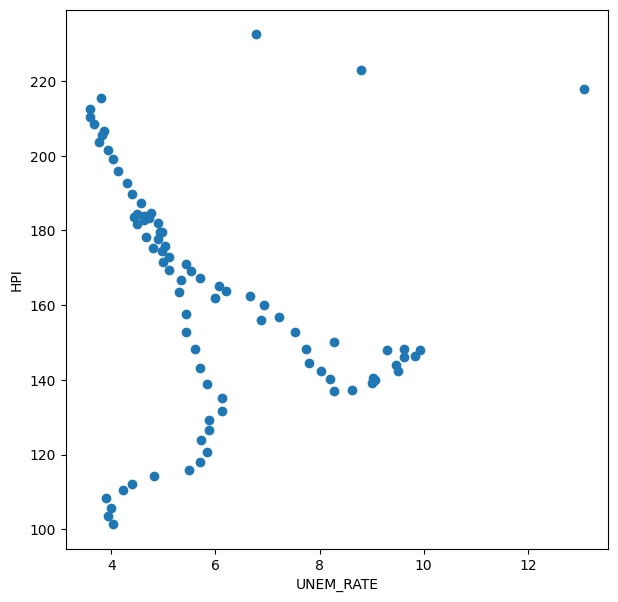

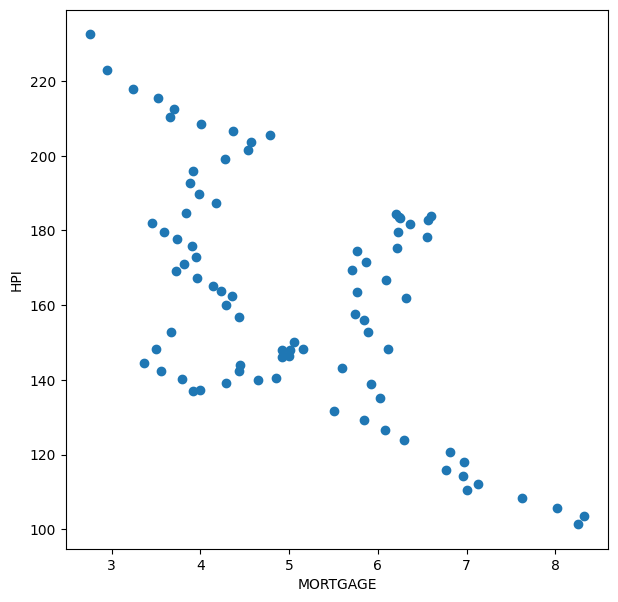

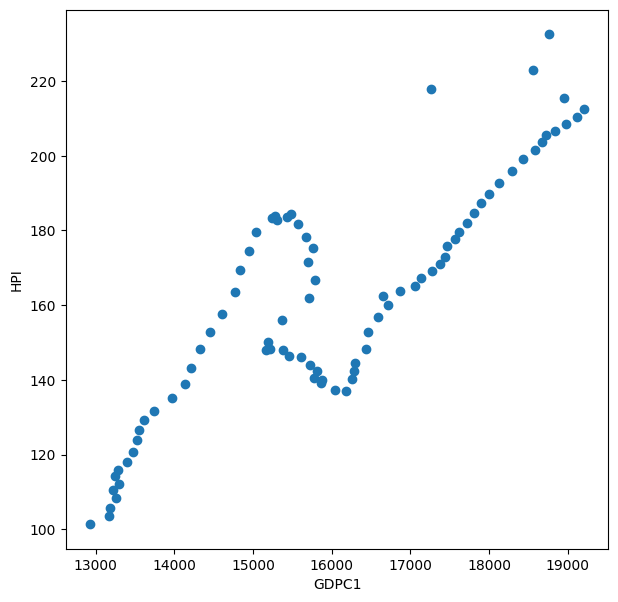

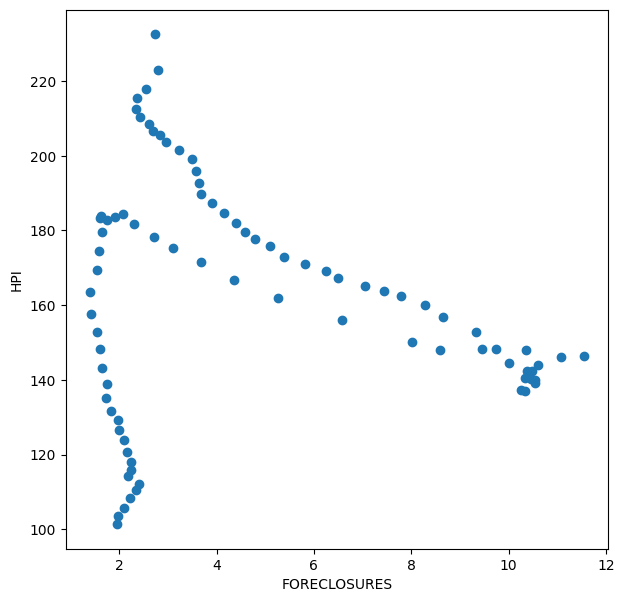

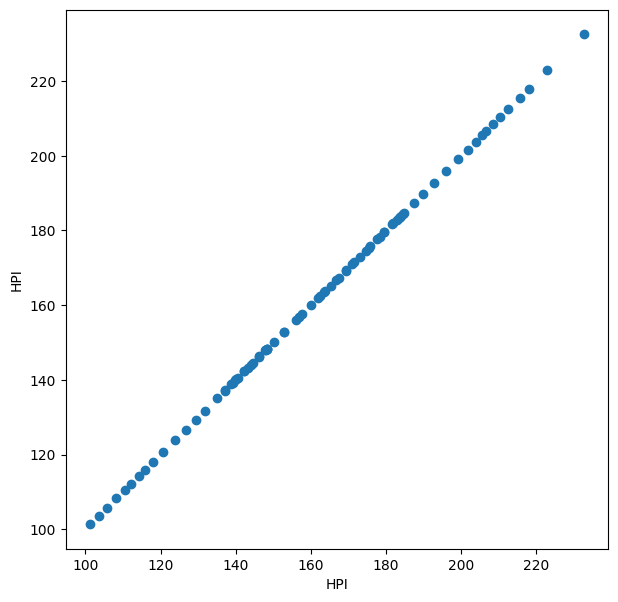

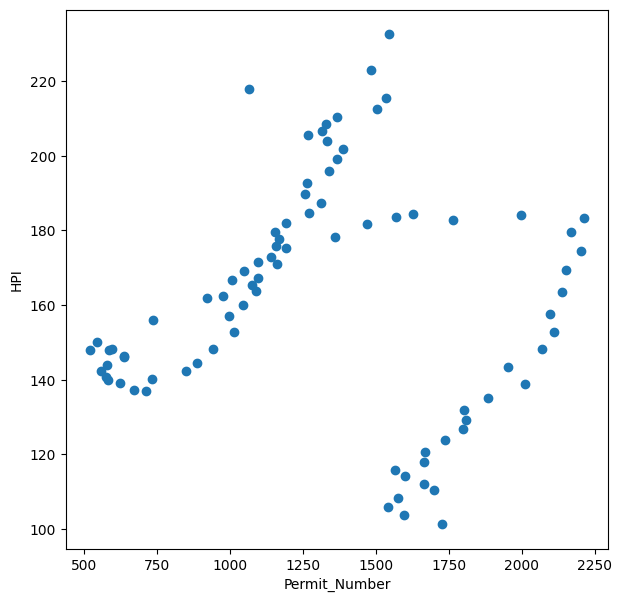

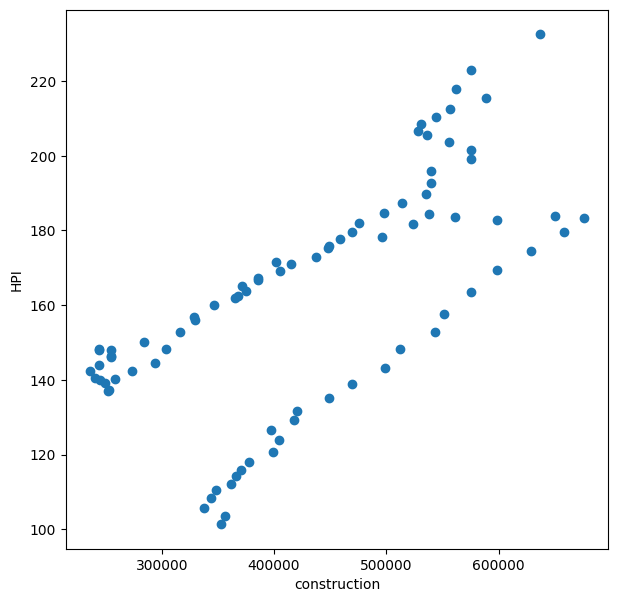

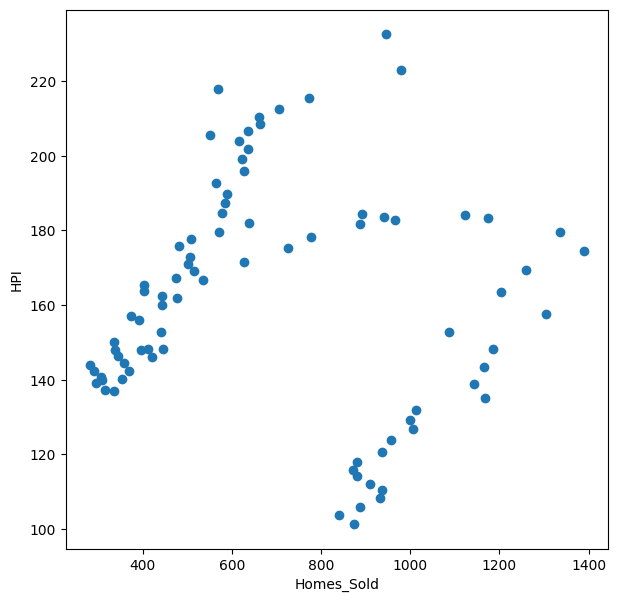

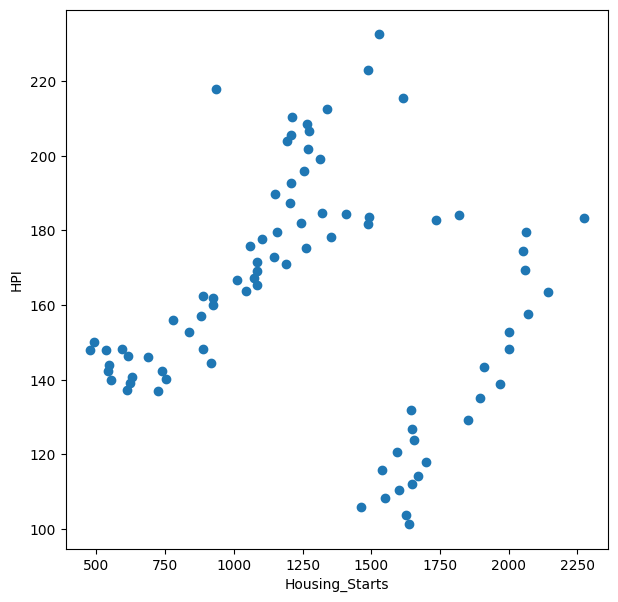

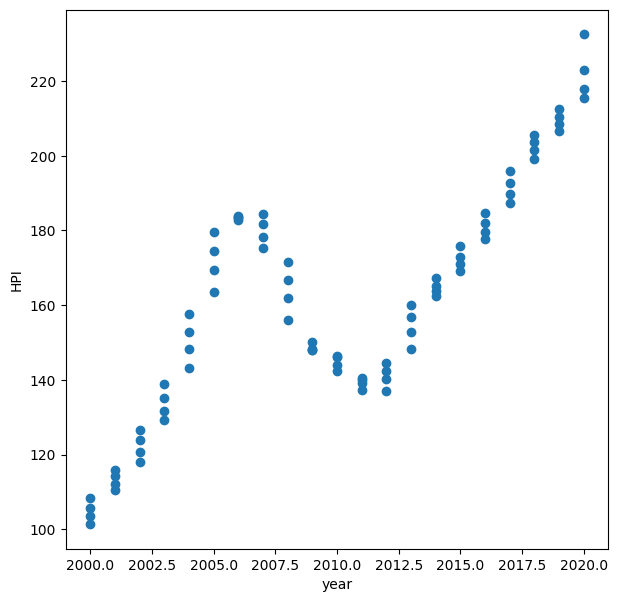

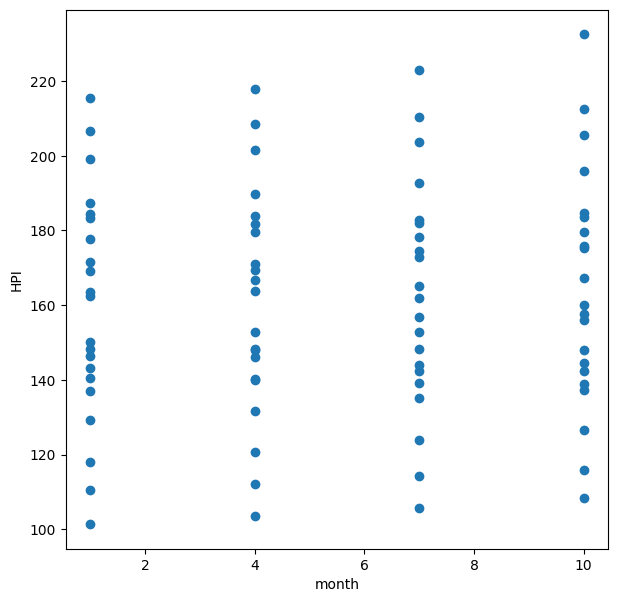

In [37]:
for feature in features:
  plt.figure(figsize=(7,7))
  plt.scatter(x=feature,y='HPI',data=df)
  plt.xlabel(feature)
  plt.ylabel("HPI")


Distplot tells variation in the data distribution.


<ipython-input-38-b477197dc647>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature],kde=True)
<ipython-input-38-b477197dc647>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature],kde=True)
<ipython-input-38-b477197dc647>:3: UserWarning: 

`distplot` is a deprecated function and 

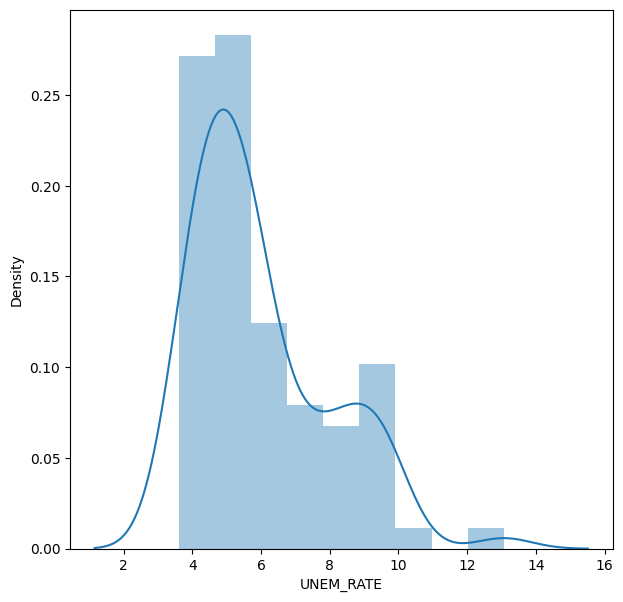

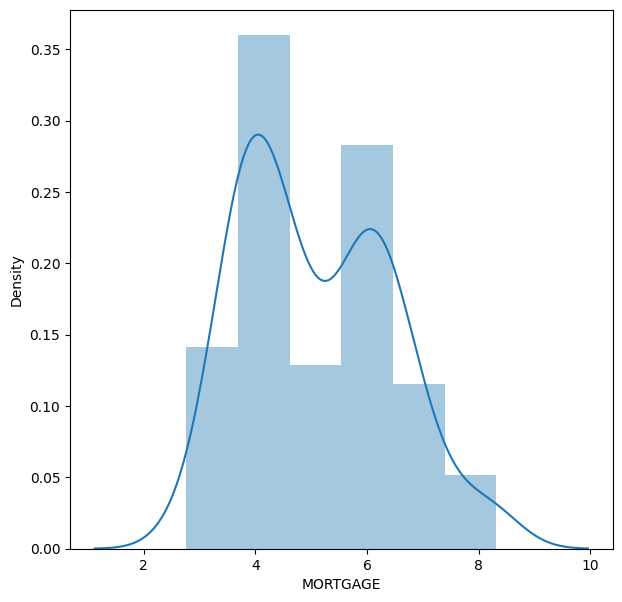

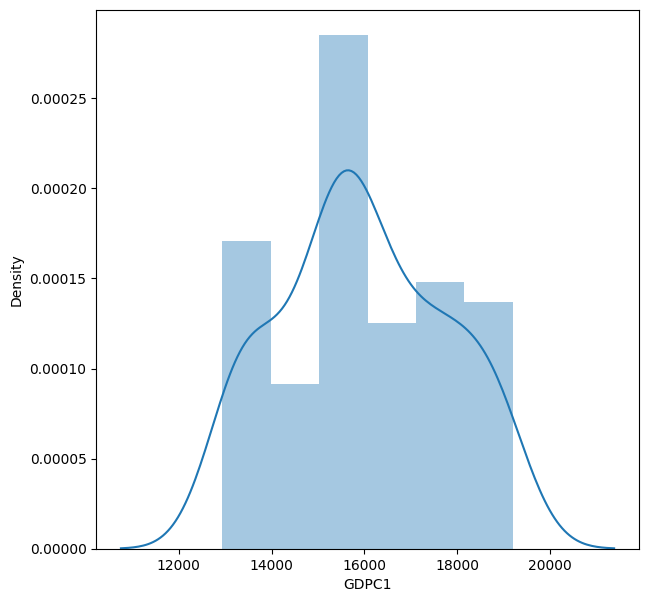

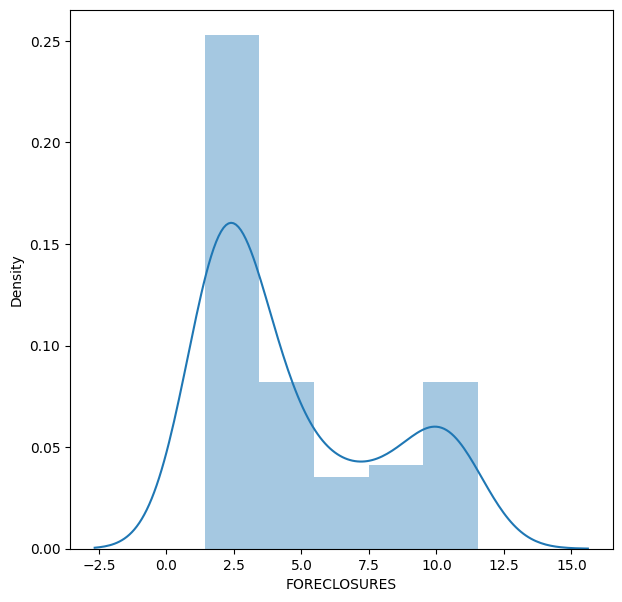

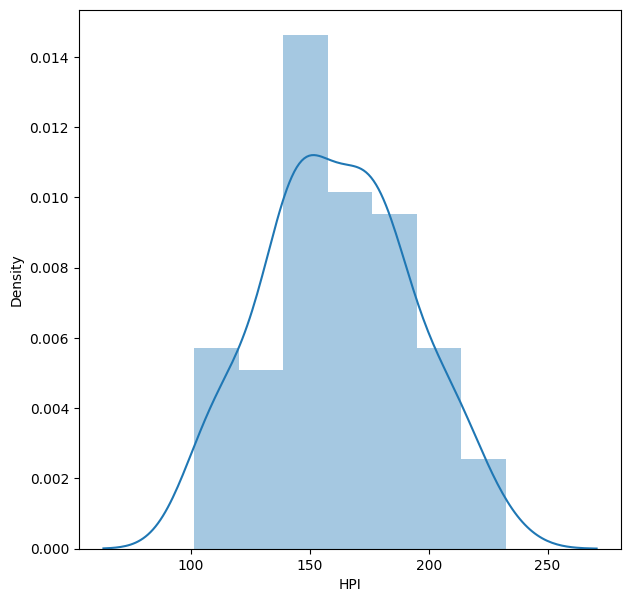

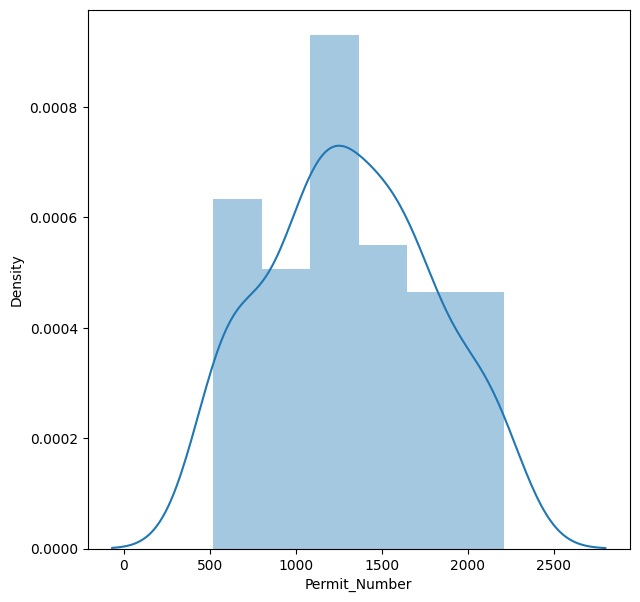

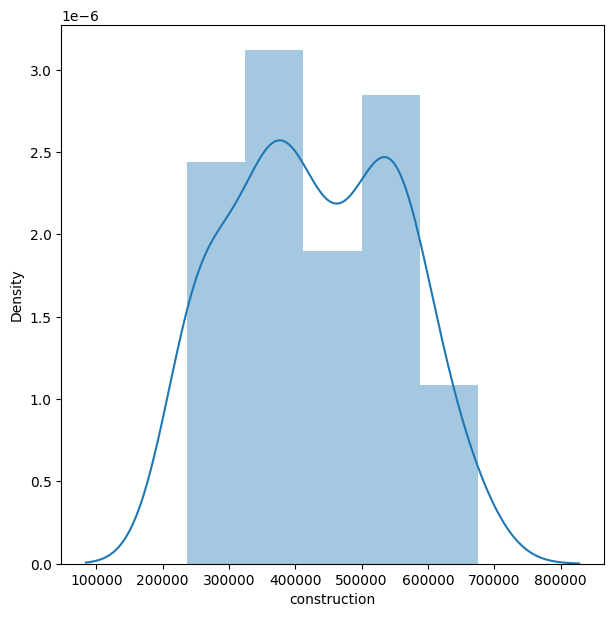

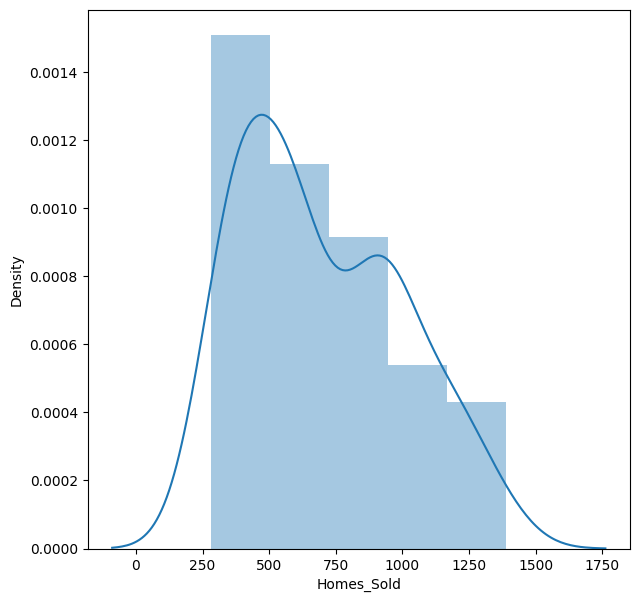

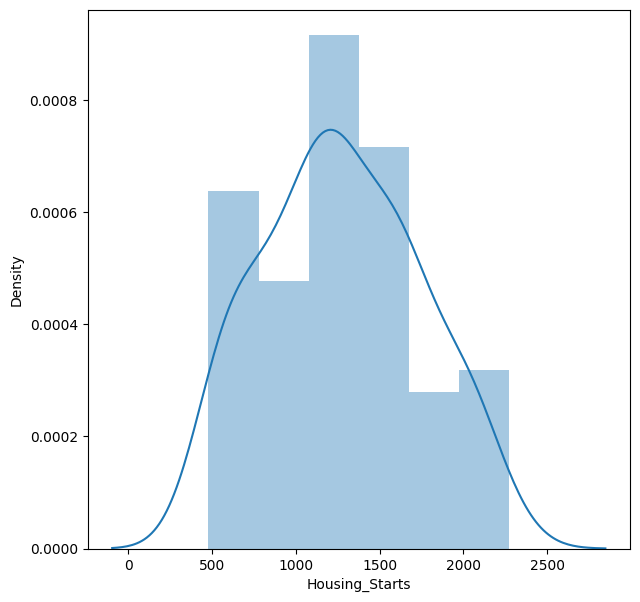

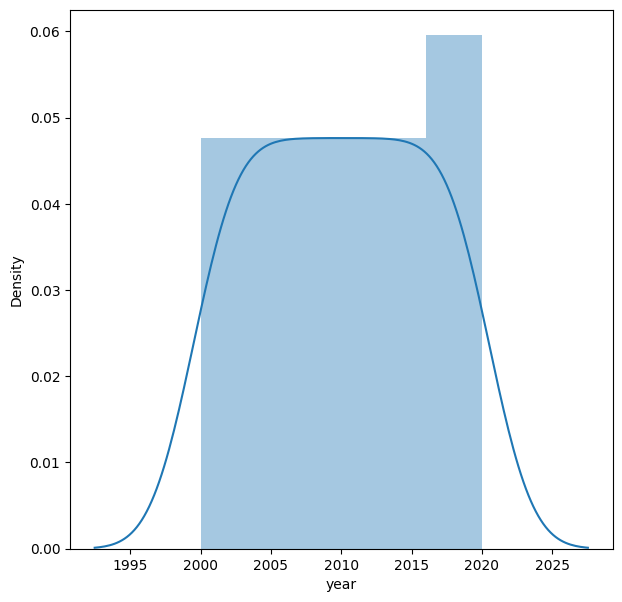

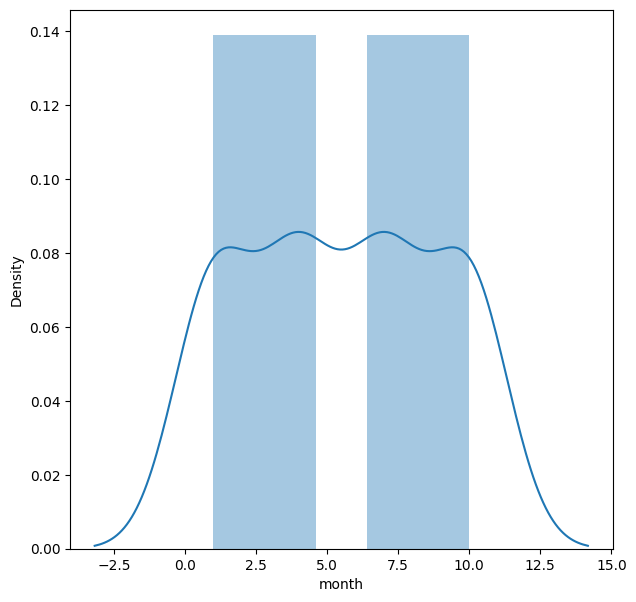

In [38]:
for feature in features:
  plt.figure(figsize=(7,7))
  sns.distplot(df[feature],kde=True)

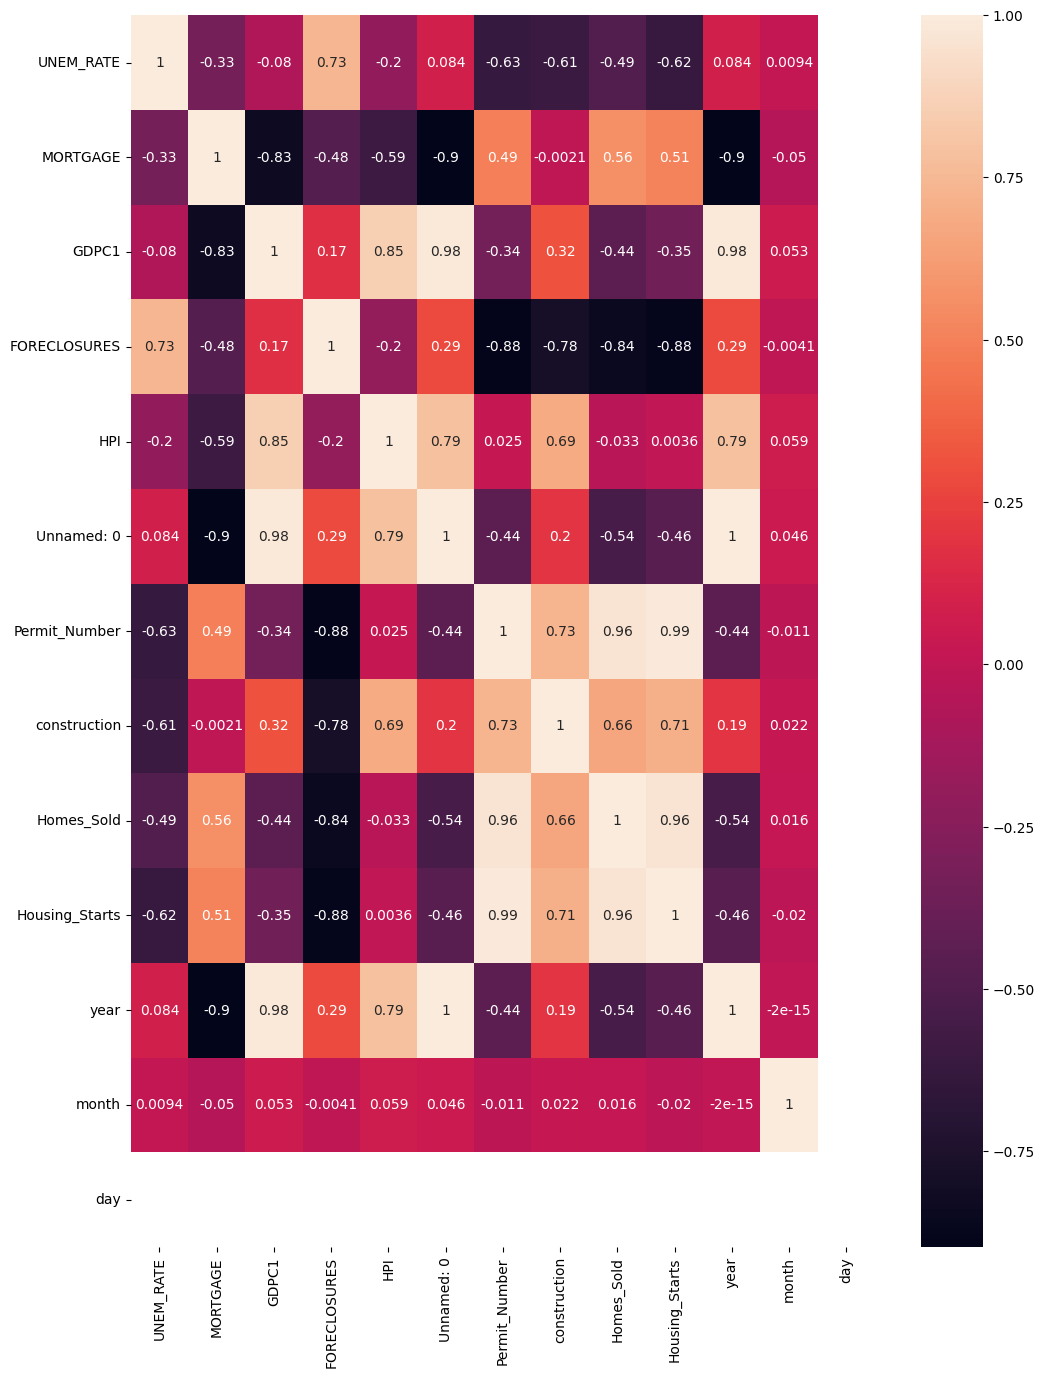

In [39]:
plt.figure(figsize=(12,16))
sns.heatmap(df.corr(),annot=True)
plt.show()

Using the heatmap we can determine which factor has more influence on the HPI.
The major variable affecting are GDPC1 and Mortgage.

Following this to detect outliers boxplot is used.

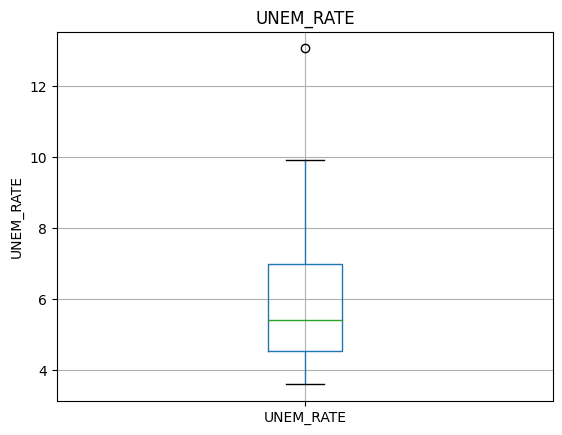

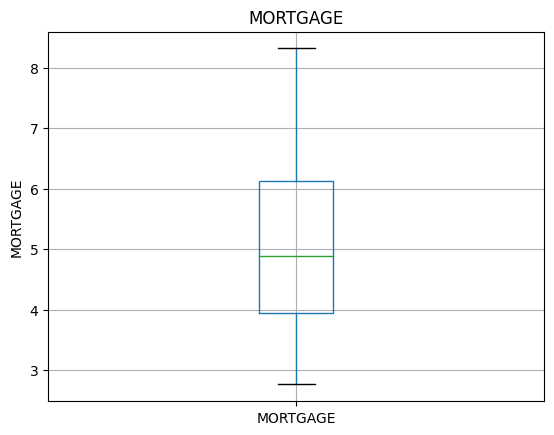

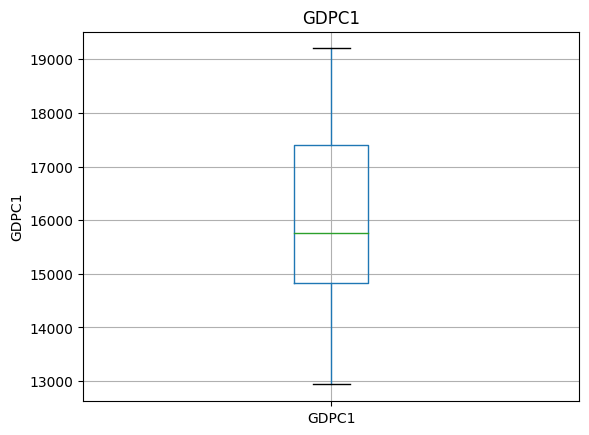

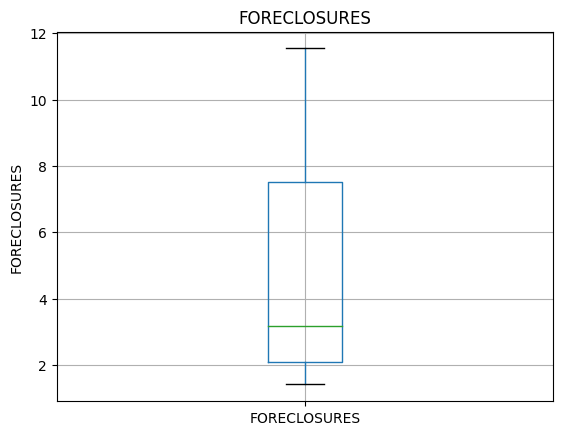

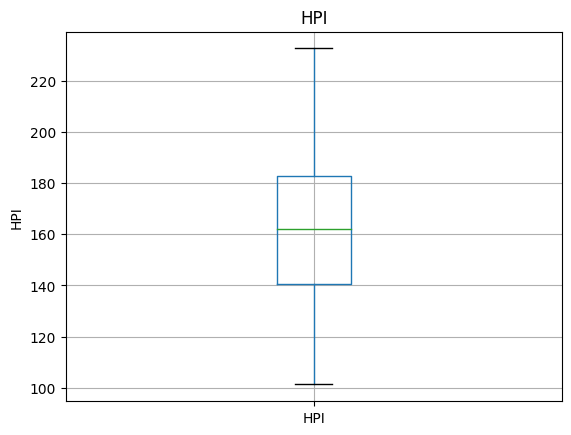

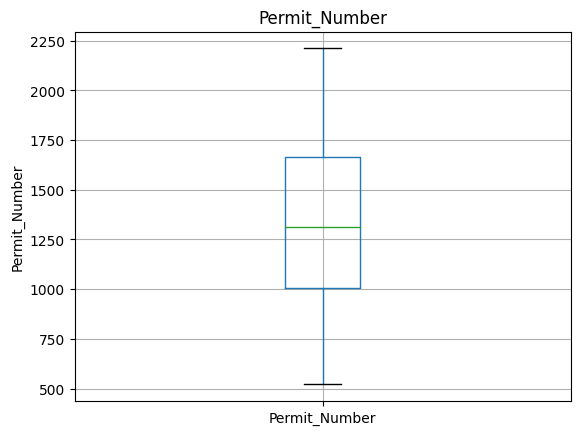

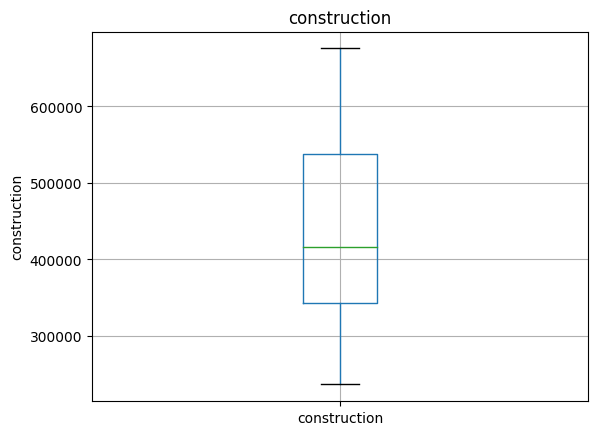

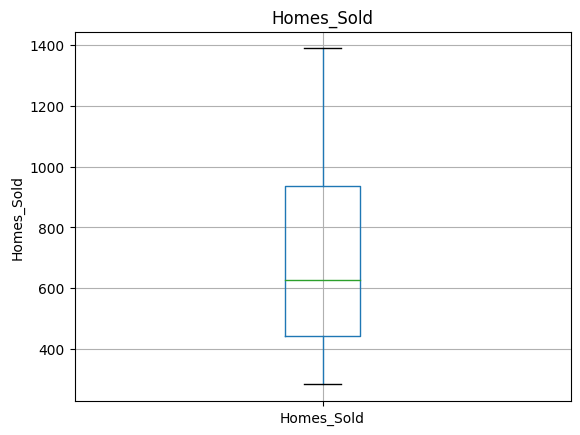

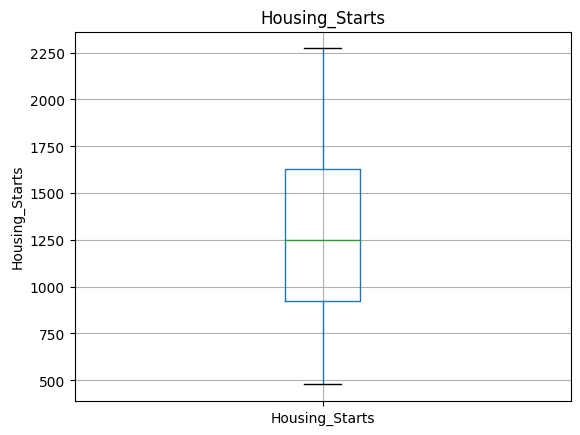

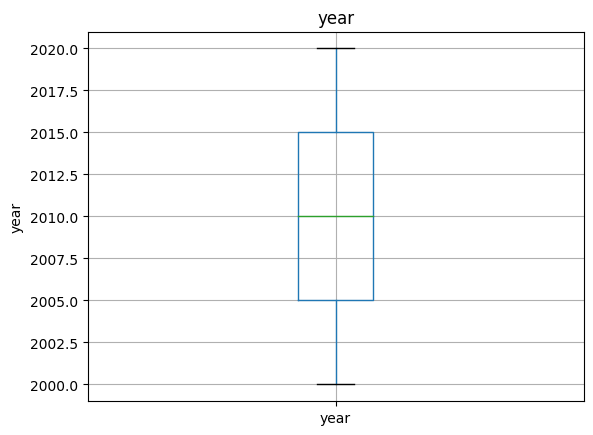

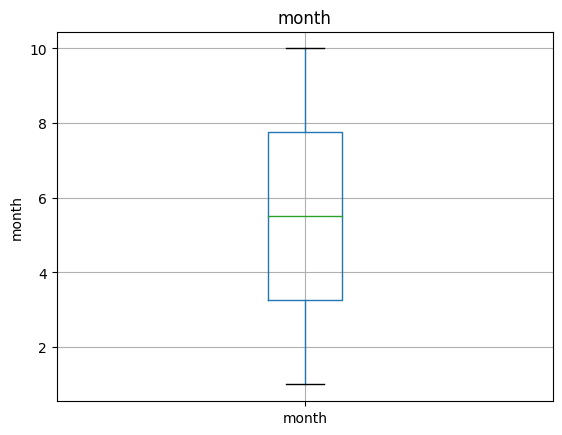

In [40]:
for feature in features:
  copy_df=df.copy()
  if 0 in copy_df[feature].unique():
    pass
  else:
    copy_df.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [42]:
X=df.drop(['day','HPI'],axis=1)
X.head()

,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,Unnamed: 0,Permit_Number,construction,Homes_Sold,Housing_Starts,year,month
0,4.03,8.26,12935.252,1.95,1,1727,353065,873,1636,2000,1
1,3.93,8.32,13170.749,1.97,4,1597,356188,841,1626,2000,4
2,4.00,8.02,13183.890,2.09,7,1542,337374,887,1463,2000,7
3,3.90,7.62,13262.250,2.23,10,1577,344095,933,1549,2000,10
4,4.23,7.01,13219.251,2.34,13,1699,348279,936,1600,2001,1


In [43]:
y=df['HPI']
y.head()

0    101.34
1    103.67
2    105.79
3    108.27
4    110.48
Name: HPI, dtype: float64

In [44]:
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-9.96040508e-01,  2.40530279e+00, -1.73087241e+00,
        -8.54521397e-01, -1.71155244e+00,  8.68021760e-01,
        -6.25836089e-01,  5.86033497e-01,  7.83412822e-01,
        -1.65144565e+00, -1.34164079e+00],
       [-1.04694547e+00,  2.45086324e+00, -1.59646998e+00,
        -8.48407014e-01, -1.67031022e+00,  5.92499346e-01,
        -6.00331525e-01,  4.79040490e-01,  7.61745219e-01,
        -1.65144565e+00, -4.47213595e-01],
       [-1.01131200e+00,  2.22306097e+00, -1.58897017e+00,
        -8.11720717e-01, -1.62906799e+00,  4.75932170e-01,
        -7.53979578e-01,  6.32842938e-01,  4.08563290e-01,
        -1.65144565e+00,  4.47213595e-01],
       [-1.06221696e+00,  1.91932459e+00, -1.54424869e+00,
        -7.68920037e-01, -1.58782576e+00,  5.50111282e-01,
        -6.99091273e-01,  7.86645385e-01,  5.94904676e-01,
        -1.65144565e+00,  1.34164079e+00],
       [-8.94230575e-01,  1.45612663e+00, -1.56878901e+00,
        -7.35290931e-01, -1.54658353e+00,  8.08678471e-01,
  

In [45]:
X_train,X_test,y_train,y_test= train_test_split(X_scaled,y,test_size=0.2,random_state=42)
X_train

array([[-1.07748845, -0.54853342,  1.63519115, -0.62523204,  1.42285685,
        -0.00305295,  0.80548201, -0.20303993, -0.00528793,  1.48630108,
        -1.34164079],
       [ 1.77318966, -0.48778615, -0.13798072,  1.79300637,  0.02062111,
        -1.5650531 , -1.51364482, -1.38665007, -1.5783559 ,  0.        ,
         0.4472136 ],
       [ 1.12669659, -0.98895116,  0.16304118,  1.74409131,  0.30931671,
        -1.24078441, -1.3975717 , -1.14925933, -1.12983652,  0.33028913,
        -0.4472136 ],
       [-0.05938913,  0.74993956, -1.38035497, -0.83923544, -1.25788794,
         1.02061879, -0.26640385,  1.03072318,  0.80941395, -1.32115652,
         1.34164079],
       [-0.67024872,  1.1068298 , -0.16918588, -0.62217485, -0.47428562,
         0.09232019,  0.54127335,  0.26839801,  0.17238642, -0.49543369,
         0.4472136 ],
       [ 2.00735251, -0.13089591, -0.33609243,  1.71657659, -0.10310557,
        -1.55657549, -1.42717594, -1.00883101, -1.60435703, -0.16514456,
         1.341

In [46]:
rf = RandomForestRegressor(n_estimators=40)
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=40)

In [47]:
y_predict = rf.predict(X_test)
y_predict

array([205.0115 , 106.34125, 162.15825, 175.28025, 132.57125, 191.249  ,
       130.506  , 158.191  , 111.90225, 177.8105 , 145.0115 , 140.724  ,
       148.3375 , 195.366  , 158.8855 , 153.76075, 160.1165 ])

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [49]:
mae = mean_absolute_error(y_test,y_predict)
mse = mean_squared_error(y_test,y_predict)
r2 = r2_score(y_test,y_predict)
print("Mean Absolute Error is: {}".format(str(mae)))
print("Mean Squared Error is: {}".format(str(mse)))
print("R2 Score is: {}".format(str(r2)))

Mean Absolute Error is: 4.587176470588217
Mean Squared Error is: 45.459137080882144
R2 Score is: 0.9505129392994929


R2 Score of 0.95 is achieved